### MSI related to ideological valence

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 

In [4]:
# Data with only columns of interest
data = pd.read_csv('Data/dataEchoChambers_with_article_info.csv', usecols=['tw_id', 'fecha', 'usr_id', 'opinion_dinamic', 'url_expanded', 'medio'])
data['fecha'] = pd.to_datetime(data['fecha'])
data.head(n = 5)

,fecha,url_expanded,medio,opinion_dinamic,tw_id,usr_id
0,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346910135377920,716295311342321665
1,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346845589233665,271519704
2,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350580142903296,987494618156675072
3,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350441126936580,770375532
4,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101353444135370754,740350122974937088


In [5]:
# Precomputed MSI of the users
score_users = pd.read_csv('Results/MSI_users.csv')
score_users.head()

,uid,msi
0,12864,0.861894
1,58613,0.672147
2,59173,-0.014711
3,624143,0.563749
4,760916,0.645047


### Ideological valence

We define the idelogical valence as the mean opinion of labeled users.

In [75]:
data_opinion = data[(data.opinion_dinamic == 'MP') | (data.opinion_dinamic == 'FF')].copy()
data_opinion['opinion_valence'] = data_opinion.apply(lambda x: 1 if x['opinion_dinamic'] == 'MP' else -1, axis = 1)

In [77]:
ideological_valence_users = data_opinion.groupby('usr_id')['opinion_valence'].mean()
ideological_valence_users.head()

usr_id
58613     0.0
760916   -1.0
778189    1.0
780281   -1.0
788034   -1.0
Name: opinion_valence, dtype: float64

In [14]:
# Merging of all data
users_msi_iv = score_users.merge(ideological_valence_users.reset_index(), left_on='uid', right_on='usr_id')[['uid', 'msi', 'opinion_valence']]
users_msi_iv.head()

### Figure 

/tmp/ipykernel_34151/3367598344.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 9600x9600 with 0 Axes>

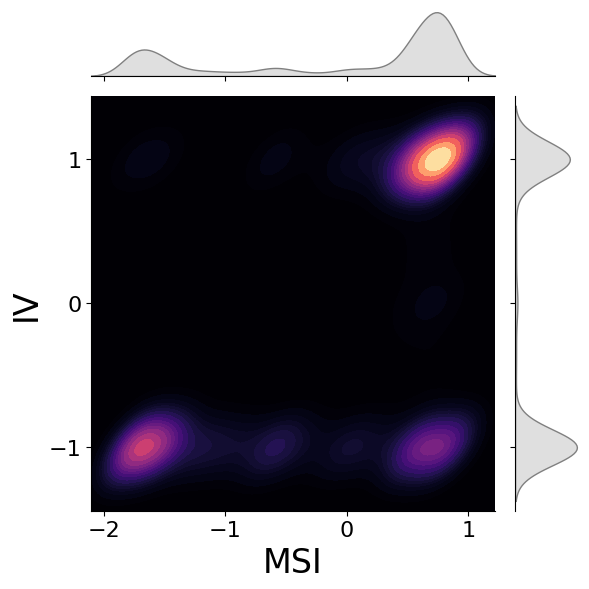

In [74]:
plt.figure(dpi = 600, figsize=(16,16))

ax1 = sns.jointplot(x = users_msi_iv['msi'], y = users_msi_iv['opinion_valence'], thresh=0, levels = 20, 
                    cmap="magma", kind = 'kde', palette = 'magma', fill = True, bw_method = 0.15, cbar = False,
                    marginal_kws = dict(color = 'grey'))

plt.sca(ax1.ax_joint)
plt.xlim(np.quantile(score_users['msi'].to_list(), q = [0.005, 0.995]) + [-0.35, 0.35])
plt.xlabel('MSI', size = 24)
plt.ylabel('IV', size = 24)
plt.xticks([-2, -1, 0, 1], size = 16)
plt.yticks([-1, 0, 1], size = 16)
plt.tight_layout()
plt.savefig('Results/MSI_ideological_valence.png')
plt.savefig('Results/MSI_ideological_valence.pdf')
plt.show()